In [1]:
import pandas as pd 
from sklearn import tree 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.DataFrame({
    'X_1': [1, 1, 1, 0, 0, 0, 0, 1],
    'X_2': [0, 0, 0, 1, 0, 0, 0, 1],
    'Y': [1, 1, 1, 1, 0, 0, 0, 0]
})

In [3]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [4]:
X = data[['X_1','X_2']]
y = data.Y

In [5]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5, 0.8333333333333334, 'X[0] <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(0.25, 0.5, 'X[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.5, 'X[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]')]

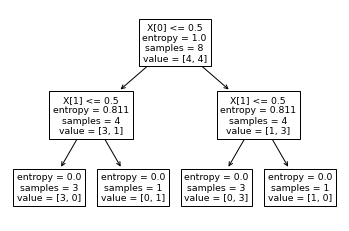

In [6]:
tree.plot_tree(clf.fit(X,y))

## Титаник

In [7]:
titanic = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


[Text(0.5, 0.875, 'X[1] <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(0.3, 0.625, 'X[0] <= 2.5\nentropy = 0.824\nsamples = 314\nvalue = [81, 233]'),
 Text(0.2, 0.375, 'X[0] <= 1.5\nentropy = 0.299\nsamples = 170\nvalue = [9, 161]'),
 Text(0.1, 0.125, 'entropy = 0.204\nsamples = 94\nvalue = [3, 91]'),
 Text(0.3, 0.125, 'entropy = 0.398\nsamples = 76\nvalue = [6, 70]'),
 Text(0.4, 0.375, 'entropy = 1.0\nsamples = 144\nvalue = [72, 72]'),
 Text(0.7, 0.625, 'X[0] <= 1.5\nentropy = 0.699\nsamples = 577\nvalue = [468, 109]'),
 Text(0.6, 0.375, 'entropy = 0.95\nsamples = 122\nvalue = [77, 45]'),
 Text(0.8, 0.375, 'X[0] <= 2.5\nentropy = 0.586\nsamples = 455\nvalue = [391, 64]'),
 Text(0.7, 0.125, 'entropy = 0.628\nsamples = 108\nvalue = [91, 17]'),
 Text(0.9, 0.125, 'entropy = 0.572\nsamples = 347\nvalue = [300, 47]')]

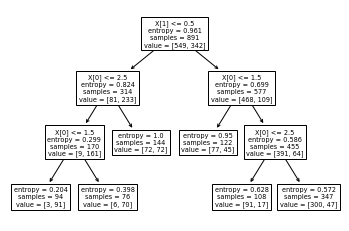

In [8]:
y = titanic.Survived
titanic["Sex"] = titanic["Sex"].replace("male",1)
titanic["Sex"] = titanic["Sex"].replace("female",0)
X = titanic[["Pclass","Sex"]]
tree.plot_tree(clf.fit(X,y))

In [9]:
titanic["Sex"] = titanic["Sex"].replace("male",1)
titanic["Sex"] = titanic["Sex"].replace("female",0)
titanic[titanic["Survived"]==True].groupby('Sex').agg({"Survived":"count"})/titanic.groupby('Sex').agg({"Survived":"count"})

,Survived
Sex,
0,0.742038
1,0.188908


In [10]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
X = titanic.drop(['PassengerId','Survived',"Name","Ticket","Cabin"],axis=1)
y = titanic[["Survived"]]

In [12]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,S
1,1,0,38.0,1,0,71.2833,C
2,3,0,26.0,0,0,7.9250,S
3,1,0,35.0,1,0,53.1000,S
4,3,1,35.0,0,0,8.0500,S


In [13]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [14]:
X = pd.get_dummies(X)#строки в числа
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,3,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,1


In [15]:
X = X.fillna({'Age':X.Age.median()})#nan -> median

In [16]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
# tree.plot_tree(clf.fit(X,y))

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)#test_size-размер тестового множества

In [20]:
clf.fit(X,y)#обучились на всём датафрейме

DecisionTreeClassifier(criterion='entropy')

In [21]:
clf.score(X,y)#пробуем предсказать на нём же

0.9797979797979798

In [22]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [23]:
clf.score(X_test,y_test)

0.7728813559322034

In [24]:
clf2 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [25]:
clf2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [26]:
clf2.score(X_test,y_test)

0.823728813559322

In [27]:
score_df = pd.DataFrame(columns=['max_depth','train_score','test_score'])

In [28]:
score_df = pd.DataFrame(columns=['max_depth','train_score','test_score'])
max_depth_list = range(1,100)

for max_depth in max_depth_list:
    clf_ = tree.DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)
    clf_.fit(X_train,y_train)
    train_score = clf_.score(X_train,y_train)
    test_score = clf_.score(X_test,y_test)
#     temp_df = pd.DataFrame({'max_depth':[max_depth], 'train_score':[train_score],'test_score':[test_score]})
    score_df.loc[len(score_df.index)] = [max_depth,train_score,test_score]



In [29]:
score_df.head()

,max_depth,train_score,test_score
0,1.0,0.781879,0.796610
1,2.0,0.805369,0.776271
2,3.0,0.823826,0.820339
3,4.0,0.833893,0.823729
4,5.0,0.840604,0.810169


In [30]:
score_df_long = pd.melt(score_df,id_vars=['max_depth'],value_vars=['train_score','test_score'],var_name='set_type',value_name="score")

In [31]:
score_df_long.head()

,max_depth,set_type,score
0,1.0,train_score,0.781879
1,2.0,train_score,0.805369
2,3.0,train_score,0.823826
3,4.0,train_score,0.833893
4,5.0,train_score,0.840604


<AxesSubplot:xlabel='max_depth', ylabel='score'>

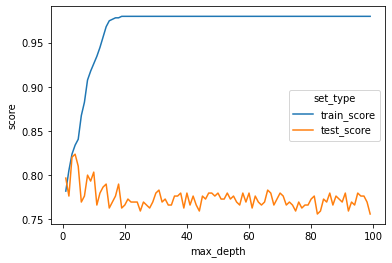

In [32]:
sns.lineplot(x='max_depth',y='score',hue='set_type',data=score_df_long)

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
score_df = pd.DataFrame(columns=['max_depth','train_score','test_score','mean_cross_val_score'])
max_depth_list = range(1,100)

for max_depth in max_depth_list:
    clf_ = tree.DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)
    clf_.fit(X_train,y_train)
    train_score = clf_.score(X_train,y_train)
    test_score = clf_.score(X_test,y_test)
    mean_cross_val_score = cross_val_score(clf_,X_train,y_train,cv=5).mean()
    score_df.loc[len(score_df.index)] = [max_depth,train_score,test_score,mean_cross_val_score]



In [35]:
score_df

,max_depth,train_score,test_score,mean_cross_val_score
0,1.0,0.781879,0.796610,0.781961
1,2.0,0.805369,0.776271,0.770196
2,3.0,0.823826,0.820339,0.790322
3,4.0,0.833893,0.823729,0.788627
4,5.0,0.840604,0.810169,0.800392
...,...,...,...,...
94,95.0,0.979866,0.769492,0.775224
95,96.0,0.979866,0.772881,0.758417
96,97.0,0.979866,0.779661,0.771863
97,98.0,0.979866,0.776271,0.763459


In [36]:
score_df_long = pd.melt(score_df,id_vars=['max_depth'],value_vars=['train_score','test_score','mean_cross_val_score'],var_name='set_type',value_name="score")

<AxesSubplot:xlabel='max_depth', ylabel='score'>

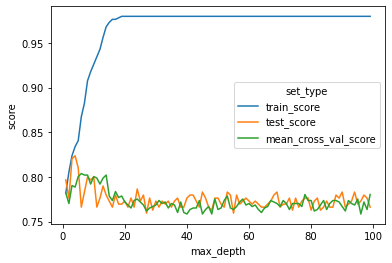

In [37]:
sns.lineplot(x='max_depth',y='score',hue='set_type',data=score_df_long)

In [38]:
score_df_long[score_df_long['set_type']=='mean_cross_val_score']

,max_depth,set_type,score
198,1.0,mean_cross_val_score,0.781961
199,2.0,mean_cross_val_score,0.770196
200,3.0,mean_cross_val_score,0.790322
201,4.0,mean_cross_val_score,0.788627
202,5.0,mean_cross_val_score,0.800392
...,...,...,...
292,95.0,mean_cross_val_score,0.775224
293,96.0,mean_cross_val_score,0.758417
294,97.0,mean_cross_val_score,0.771863
295,98.0,mean_cross_val_score,0.763459


In [39]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=10)

#### 2.1.12

In [60]:
train_df = pd.read_csv('train_iris.csv', index_col=0)
test_df  = pd.read_csv('test_iris.csv', index_col=0)
train_df

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2
...,...,...,...,...,...
147,6.5,3.0,5.2,2.0,2
124,6.7,3.3,5.7,2.1,2
123,6.3,2.7,4.9,1.8,2
146,6.3,2.5,5.0,1.9,2


In [61]:
X_train = train_df.drop(['species'],axis=1)
y_train = train_df['species']

X_test  = test_df.drop(['species'],axis=1)
y_test = test_df['species']

In [62]:
full_df = pd.DataFrame(columns=['max_depth','score','accuracy_score'])

In [85]:
from sklearn.metrics import accuracy_score
import numpy as np
rs = np.random.seed(0)

for max_depth in range(1,100):
    iris_clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=max_depth,random_state=rs)
    iris_clf.fit(X_train,y_train)
    score_test = iris_clf.score(X_test,y_test)
    score_train = iris_clf.score(X_train,y_train)
    full_df.loc[len(full_df.index)] = [max_depth,score_test,score_train]
full_df

,max_depth,score,accuracy_score
0,1.0,0.60,0.70
1,2.0,0.94,0.97
2,3.0,0.94,0.99
3,4.0,0.92,1.00
4,5.0,0.92,1.00
...,...,...,...
688,95.0,0.92,1.00
689,96.0,0.92,1.00
690,97.0,0.92,1.00
691,98.0,0.94,1.00


In [86]:
full_df_long = pd.melt(full_df,id_vars=['max_depth'],value_vars=['score','accuracy_score'],var_name='set_type',value_name="score_")

<AxesSubplot:xlabel='max_depth', ylabel='score_'>

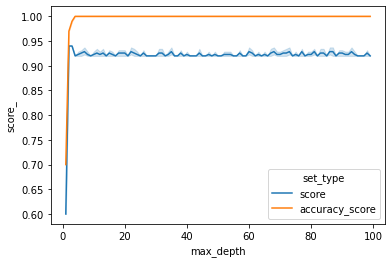

In [87]:
sns.lineplot(x='max_depth',y='score_',hue='set_type',data=full_df_long)

#### котики собачки

In [107]:
train = pd.read_csv('dogs_n_cats.csv')
test = pd.read_json('dataset_209691_15.txt')

In [109]:
X_train = train.drop('Вид',axis=1)
y_train = train['Вид']

In [110]:
clf_dnc = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf_dnc.fit(X_train,y_train)
test['вид'] = clf_dnc.predict(test)
test

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,вид
0,30,36.0,1,1,0,собачка
1,19,22.8,1,1,0,собачка
2,20,24.0,1,1,0,собачка
3,15,18.0,1,1,0,собачка
4,24,28.8,1,1,0,собачка
...,...,...,...,...,...,...
95,7,2.8,1,0,1,котик
96,12,4.8,1,0,1,котик
97,14,5.6,1,0,1,котик
98,14,5.6,1,0,1,котик


In [112]:
test.groupby('вид').agg({'Длина':'count'})

,Длина
вид,
котик,43
собачка,57


In [118]:
songs = pd.read_csv('songs.csv').head()
songs

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3


In [119]:
songs_ = songs.drop(columns=['song','genre','lyrics'])
songs_.head()

,year,artist,length,commas,exclamations,colons,hyphens
0,2007,gangstarr,1300,24,5,0,11
1,2006,blind-guardian,1566,0,0,0,0
2,2006,blind-guardian,996,1,0,1,0
3,2015,blind-guardian,2868,5,0,0,0
4,2014,gangstarr,3351,22,0,0,3


In [ ]:
X_train,y_train